In [6]:
import gdown
import os

In [7]:
dataset_url = "https://drive.google.com/file/d/1_cSFXzsThXhzkRKMTdGM-4L1QnHEiFid/view?usp=sharing"
os.makedirs("data", exist_ok=True)
file_id = dataset_url.split("/")[-2]
prefix = 'https://drive.google.com/uc?/export=download&id='
zip_download_dir="data/data.zip"
gdown.download(prefix+file_id,zip_download_dir)

Downloading...
From: https://drive.google.com/uc?/export=download&id=1_cSFXzsThXhzkRKMTdGM-4L1QnHEiFid
To: /content/data/data.zip
100%|██████████| 19.9M/19.9M [00:00<00:00, 70.5MB/s]


'data/data.zip'

In [8]:
import zipfile
unzip_path ="data"
os.makedirs(unzip_path, exist_ok=True)
with zipfile.ZipFile("data/data.zip", 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:


# Paths
train_dir = 'dataset_split/train'
val_dir = 'dataset_split/val'
test_dir = 'dataset_split/test'

# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 100

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)






Found 2100 images belonging to 2 classes.
Found 450 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


In [4]:
# Model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('densenet121_best.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
25/66 ━━━━━━━━━━━━━━━━━━━━ 4:07 6s/step - accuracy: 0.5960 - loss: 0.8138

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


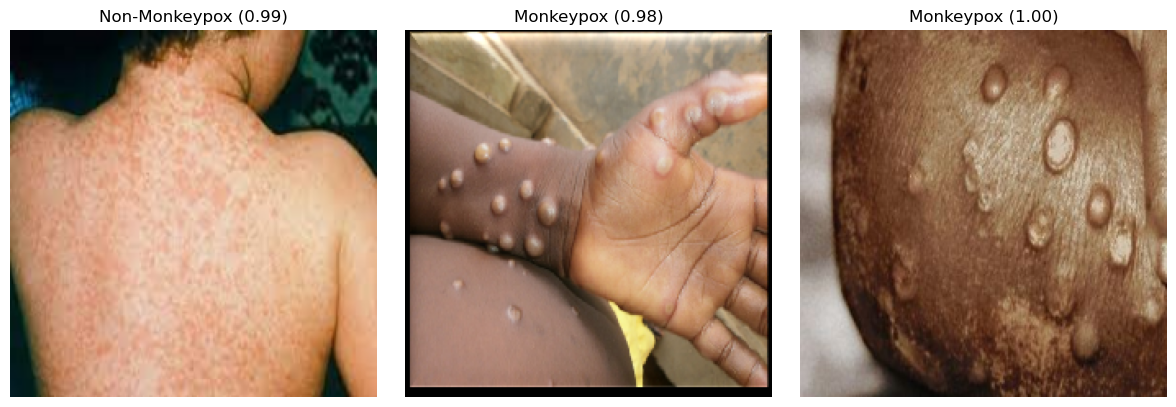

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Model Path
model_path = 'densenet121_best.h5'

# Load Model
try:
    model = tf.keras.models.load_model(model_path)
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Image Paths
test_images = ['dataset1/Measles/measles1.png', '23.webp', 'dataset1/Monkeypox/monkeypox1.png']
labels = ['Monkeypox', 'Non-Monkeypox']
img_size = (224, 224)

# Plot and Predict
plt.figure(figsize=(12, 4))

for i, img_path in enumerate(test_images):
    try:
        # Load and preprocess image
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            prediction = model.predict(img_array)[0][0]
            pred_label = labels[int(prediction > 0.5)]
            prob = prediction if prediction > 0.5 else 1 - prediction

            # Display
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.title(f"{pred_label} ({prob:.2f})")
            plt.axis('off')
        else:
            print(f"Image not found: {img_path}")
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

plt.tight_layout()
plt.show()


Loading weights...
Evaluating on Test Data...


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9680 - loss: 0.0868
Test Accuracy: 0.9733333587646484
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       225
           1       0.97      0.98      0.97       225

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

Confusion Matrix:
 [[217   8]
 [  4 221]]


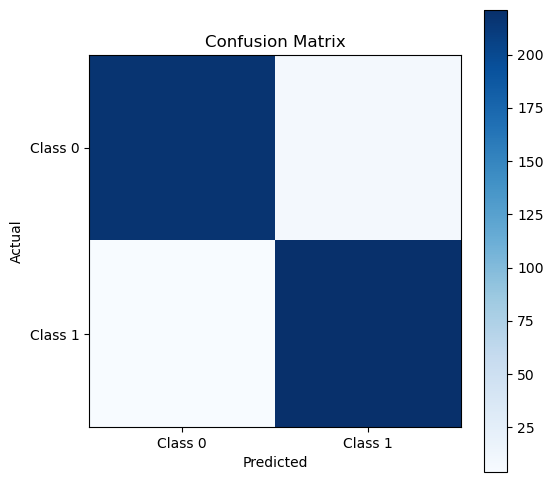

In [5]:
# Load weights
print("Loading weights...")
model.load_weights('densenet121_best.h5')

# Evaluate on Test Data
print("Evaluating on Test Data...")
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc}")

# Predictions
y_pred = model.predict(test_gen)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
y_true = test_gen.classes

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting (if you don't have `history`, only the evaluation metrics can be plotted)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Interactive Confusion Matrix Plot
fig = px.imshow(conf_matrix, text_auto=True, color_continuous_scale='Blues')
fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
    coloraxis_colorbar=dict(title='Count')
)
fig.show()

# Classification Report
report = classification_report(y_true, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_true, y_pred))
# Extract metrics
labels = list(report.keys())[:-3]  # Exclude accuracy, macro avg, weighted avg
metrics = ['precision', 'recall', 'f1-score']
data = {metric: [report[label][metric] for label in labels] for metric in metrics}

# Interactive Classification Report Plot
fig = go.Figure()
for metric in metrics:
    fig.add_trace(go.Bar(
        x=labels,
        y=data[metric],
        name=metric,
        text=[f'{value:.2f}' for value in data[metric]],
        textposition='auto'
    ))


fig.update_layout(
    title='Classification Report',
    xaxis=dict(title='Class Labels'),
    yaxis=dict(title='Metric Value'),
    barmode='group'
)
fig.show()


Confusion Matrix:
 [[217   8]
 [  4 221]]


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       225
           1       0.97      0.98      0.97       225

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

